# Dielectric medium

In [1]:
import numpy as np 
from bokeh.plotting import figure, show, gridplot, output_notebook

output_notebook()

Loading BokehJS ...

$$ χ = ε_r - 1 $$
$$ ε = ε_r ε_0 = (1+χ) ε_0 $$
$$ 𝐏 = ε_0 χ 𝐄 $$
$$ 𝐃 = ε_0 𝐄 + 𝐏 = ε_0(1+χ)𝐄 = ε_0 ε_r 𝐄 = ε 𝐄 $$


$$ \dot{𝐃} = ε_0 ε_r \dot{𝐄} = ∇ × 𝐇 \tag{1.13a} $$
$$ μ_0 \dot{𝐇} = ∇ × 𝐄 \tag{1.13b} $$

$$ \dot{D_x} = ε_0 ε_r \dot{E_x} = - (H_y)_z $$
$$ μ_0 \dot{H_y} = - (E_x)_z $$


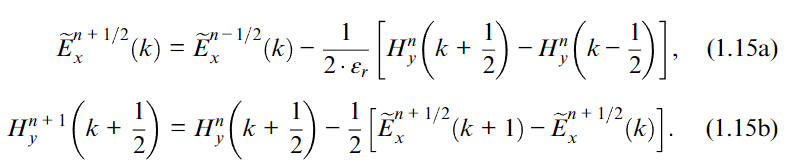

In [6]:
ke = 200

nsteps = 400

Ex = np.zeros([nsteps, ke])
Hy = np.zeros([nsteps, ke])

t0 = 40
spread = 12

bc_low = [0, 0]
bc_high = [0, 0]

# ε - dielectric profile
cb = 0.5 * np.ones(ke)
cb_start = 100
eps = 4
cb[cb_start:] = 0.5 / eps

##########################################################
for ts in range(1, nsteps):
    # Ex
    for k in range(1, ke):
        ts_n = ts - 1
        Ex[ts, k] = Ex[ts_n, k] + cb[k] * (Hy[ts_n, k - 1] - Hy[ts_n, k])

    # Gaussian pulse
    pulse = np.exp(-0.5 * ((t0 - ts) / spread) ** 2)
    Ex[ts, 5] = pulse + Ex[ts, 5]

    # Absorbing BC
    Ex[ts, 0] = bc_low.pop(0)
    bc_low.append(Ex[ts, 1])
    Ex[ts, ke - 1] = bc_high.pop(0)
    bc_high.append(Ex[ts, ke - 2])

    # Hy
    for k in range(ke - 1):
        ts_n = ts - 1
        Hy[ts, k] = Hy[ts_n, k] + 0.5 * (Ex[ts, k] - Ex[ts, k + 1])


In [7]:
_fparams = dict(width=900, height=300, x_axis_label="Z", y_axis_label="t")
fig1 = figure(**_fparams)
fig2 = figure(**_fparams)

_params = dict(level="image", x=0, y=0, dw=ke, dh=nsteps, palette="Turbo256")

fig1.image(image=[Ex], **_params)
fig2.image(image=[Hy], **_params)

show(gridplot([[fig1], [fig2]]))